In [2]:
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

In [10]:
vcpu = 16

log_path = Path(f"/home/ubuntu/repos/thesis/logs_all")
MACHINE = "g5.4xlarge"
BATCH_SIZE = 128
DATASET = "imagenet_10pct"

model_name = f"resnet18_bs_{BATCH_SIZE}"

model_path_prefix = "resnet18_pretrained_pid"

# Single training
train_path = log_path / "single_runs" / DATASET

# Shared data training
train_mul_path = log_path / "queues" / DATASET / model_name

naive_model_path_prefix = f"resnet18_pretrained_bs{BATCH_SIZE}_{vcpu}tw_1vw_pid"
shared_model_path_prefix = f"resnet18_pretrained_bs{BATCH_SIZE}_{vcpu}tw_1vw_1pf_pid"

if DATASET == "compcars":
    # CompCars, BS 128
    if vcpu == 16:
        pids = [
            37983, 38444, 18846, 21708, # Naive
            39322, 39800, 25170, 28290, # MPS
            3662, 5114, 33686, 35676, # Shared
            7042, 8518, 38021, 39914, # Shared + MPS
            11012, 11795, 42153, 42966, 109189, 109762, # Naive + DALI
            12515, 12980, 44044, 44751, 110977, 111379, 111832, 112342, # Shared + DALI
        ]

        trace_pids = [
            37983, 38444, 18846, 21708, 109189, # Naive
            39322, 39800, 25170, 28290, # MPS
            3570, 5028, 33609, 35590, # Shared
            6960, 8424, 37939, 39827, # Shared + MPS
            11012, 11795, 42153, 42966, # Naive + DALI
            12454, 12918, 43976, 44681, 110928, 111329, 111783, 112293, # Shared + DALI
        ]
    if vcpu == 8:
        pids = [
            60042, 61237, 63045, 65434, # Naive
            68455, 69517, 71135, 73432, # MPS
            76309, 77307, 78665, 80463, # Shared
            82611, 83639, 84891, 86504, # Shared + MPS
            88408, 88727, 89289, 90076, # Naive + DALI
            91116, 91501, 92043, 92924, # Shared + DALI
        ]

        trace_pids = [
            60042, 61237, 63045, 65434, # Naive
            68455, 69517, 71135, 73432, # MPS
            76250, 77248, 78603, 80387, # Shared
            82553, 83581, 84833, 86446, # Shared + MPS
            88408, 88727, 89289, 90076, # Naive + DALI
            91071, 91450, 91998, 92855, # Shared + DALI
        ]
    if vcpu == 4:
        pids = [
            93992, 95224, 97451, 100642, # Naive
            102157, 102414, 102903, 103596, # MPS
            104520, 104803, 105126, 105510, # Shared
            105959, 106262, 106620, 107037, # Shared + MPS
            107449, 107546, 107730, 107970, # Naive + DALI
            108319, 108427, 108582, 108829, # Shared + DALI
        ]

        trace_pids = [
            93992, 95224, 97451, 100642, # Naive
            102157, 102414, 102903, 103596, # MPS
            104496, 104776, 105102, 105486, # Shared
            105935, 106237, 106593, 107003, # Shared + MPS
            107449, 107546, 107730, 107970, # Naive + DALI
            108297, 108406, 108561, 108806, # Shared + DALI
        ]

if DATASET == "imagenet_10pct":
    pids = [
        43031, 43524, 44467, 45857, # Naive
        47705, 48213, 49144, 50530, # MPS
        52391, 53142, 54028, 55031, # Shared
        56174, 56954, 57828, 58817, # Shared MPS
        59839, 60008, 60260, 0, # Naive DALI
        61119, 61323, 61671, 62033, # Shared DALI
    ]

    trace_pids = [
        43031, 43524, 44467, 45857, # Naive
        47705, 48213, 49144, 50530, # MPS
        52327, 53078, 53963, 54967, # Shared
        56110, 56890, 57764, 58753, # Shared MPS
        59839, 60008, 60260, 0, # Naive DALI
        61070, 61274, 61560, 61980, # Shared DALI
    ]
if DATASET == "imagenet":
    pids = [
        93491, 106831, 131233, 194332, # Naive
        222189, 2936, 12962, 16121, # Shared
    ]

    trace_pids = [
        93491, 106831, 131233, 194332, # Naive
        222070, 2801, 12892, 16052, # Shared
    ]
if DATASET == "cifar10":
    pids = [
        163281, 164111, 165323, 166972, 169049, 171584, 174559, 177970, # Naive
        4743, 5701, 7056, 8806, 10978, 13556, 16469, 19839, # MPS
        181889, 182876, 183936, 185101, 186385, 187786, 189309, 190946, # Shared
        23573, 24561, 25598, 26705, 27872, 29136, 30477, 31900, # Shared MPS
        33318, 33756, 34315, 35004, 35824, 36788, 37922, 39267, # Naive DALI
        40858, 41275, 41779, 42387, 43140, 44105, 45215, 46383, # Shared DALI
    ]

    trace_pids = [
        163281, 164111, 165323, 166972, 169049, 171584, 174559, 177970, # Naive
        4743, 5701, 7056, 8806, 10978, 13556, 16469, 19839, # MPS
        181807, 182794, 183854, 185012, 186301, 187704, 189226, 190863, # Shared
        23491, 24478, 25516, 26622, 27790, 29046, 30389, 31817,  # Shared MPS
        33318, 33756, 34315, 35004, 35824, 36788, 37922, 39267, # Naive DALI
        40793, 41213, 41717, 42326, 43071, 44040, 45146, 46321, # Shared DALI
    ]

In [13]:
# BASELINE
if DATASET == "cifar10":
    workloads = ("1x RN18", "2x RN18", "3x RN18", "4x RN18", "5x RN18", "6x RN18", "7x RN18", "8x RN18")

    naive = [pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[i]}.csv") for i in range(0, 8)]
    naive = [df.iloc[2:]["total_time"].mean() for df in naive]

    mps = [pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[i]}.csv") for i in range(8, 16)]
    mps = [df.iloc[2:]["total_time"].mean() for df in mps]

    shared = [pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[i]}.csv") for i in range(16, 24)]
    shared = [df.iloc[2:]["total_time"].mean() for df in shared]

    shared_mps = [pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[i]}.csv") for i in range(24, 32)]
    shared_mps = [df.iloc[2:]["total_time"].mean() for df in shared_mps]

    naive_dali = [pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[i]}.csv") for i in range(32, 40)]
    naive_dali = [df.iloc[2:]["total_time"].mean() for df in naive_dali]

    shared_dali = [pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[i]}.csv") for i in range(40, 48)]
    shared_dali = [df.iloc[2:]["total_time"].mean() for df in shared_dali]
    
if DATASET == "imagenet_10pct":
    workloads = ("1x RN18", "2x RN18", "3x RN18", "4x RN18")

    naive = [pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[i]}.csv") for i in range(0, 4)]
    naive = [df.iloc[2:]["total_time"].mean() for df in naive]

    mps = [pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[i]}.csv") for i in range(4, 8)]
    mps = [df.iloc[2:]["total_time"].mean() for df in mps]

    shared = [pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[i]}.csv") for i in range(8, 12)]
    shared = [df.iloc[2:]["total_time"].mean() for df in shared]

    shared_mps = [pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[i]}.csv") for i in range(12, 16)]
    shared_mps = [df.iloc[2:]["total_time"].mean() for df in shared_mps]

    naive_dali = [pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[i]}.csv") for i in range(16, 19)]
    naive_dali = [df.iloc[2:]["total_time"].mean() for df in naive_dali] + [0]

    shared_dali = [pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[i]}.csv") for i in range(20, 23)]
    shared_dali = [df.iloc[2:]["total_time"].mean() for df in shared_dali] + [0]
    

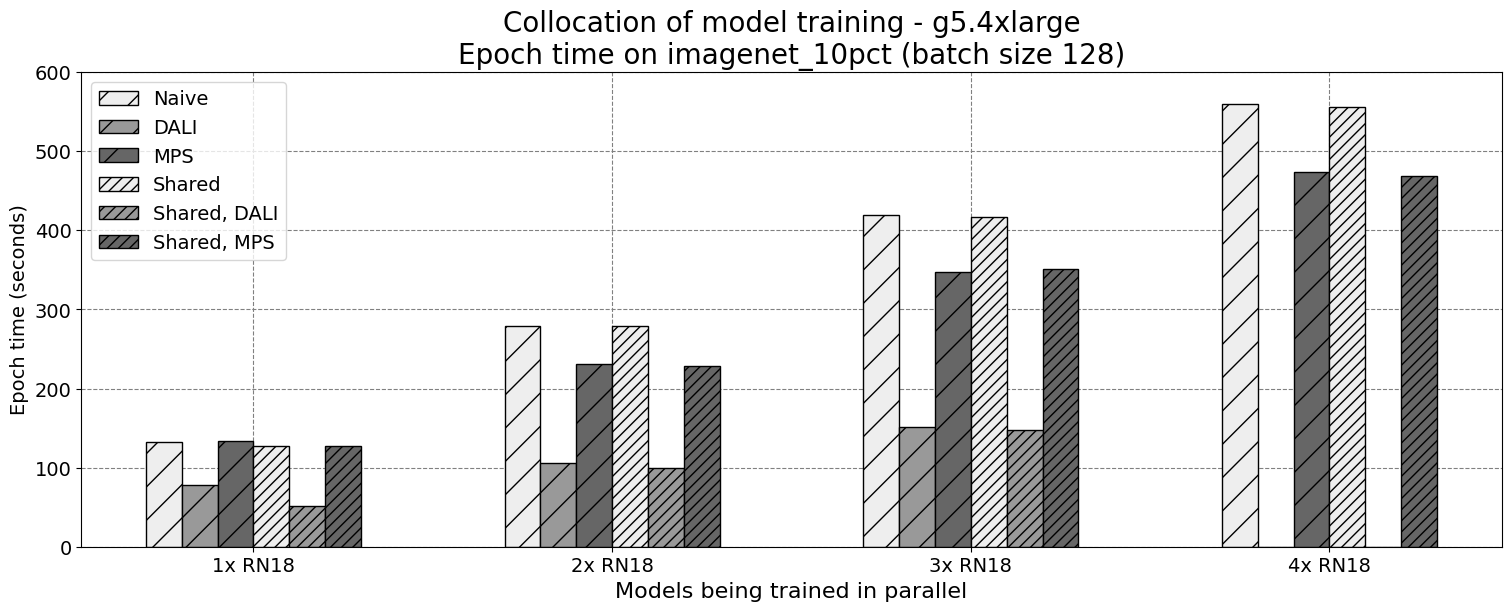

In [18]:
import matplotlib.pyplot as plt
import numpy as np


measurements ={
    "Naive": naive,
    "DALI": naive_dali,
    "MPS": mps,
    "Shared": shared,
    "Shared, DALI": shared_dali,
    "Shared, MPS": shared_mps,
}

x = np.arange(len(workloads))  # the label locations
width = 0.1  # the width of the bars
multiplier = -1.5

fig, ax = plt.subplots(layout='constrained', figsize=(15,6))
hatches = ["/", "/", "/", "///", "///", "///"]
hatch_cols = ["#eeeeee", "#999999", "#666666", 
              "#eeeeee", "#999999", "#666666"]

for idx, (attribute, measurement) in enumerate(measurements.items()):
    offset = width * multiplier
    #rects = ax.bar(x + offset, measurement, width, label=attribute, color=shades[idx], edgecolor="black", yerr=measurements_err[attribute][idx], ecolor="red", capsize=5)
    rects = ax.bar(x + offset, measurement, width, label=attribute, hatch=hatches[idx], color=hatch_cols[idx], edgecolor="black")
    #ax.bar_label(rects, padding=3, fmt='%.0f', label_type="edge", color="black", size=16)
    multiplier += 1


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Epoch time (seconds)', fontsize=14)
ax.set_title(f'Collocation of model training - {MACHINE}\nEpoch time on {DATASET} (batch size {BATCH_SIZE})', fontsize=20)
ax.set_xticks(x + width, workloads, fontsize=14)
ax.legend(loc='upper left', fontsize=14)

ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')
plt.yticks([i for i in range(0, 601, 100)], fontsize=14)
plt.xlabel("Models being trained in parallel", fontsize=16)
plt.show()

In [34]:
# BASELINE

df_1x = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[0]}.csv")
df_2x = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[1]}.csv")
df_3x = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[2]}.csv")
df_4x = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[3]}.csv")

# BASELINE + MPS

df_1x_mps = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[4]}.csv")
df_2x_mps = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[5]}.csv")
df_3x_mps = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[6]}.csv")
df_4x_mps = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[7]}.csv")

# SHARED DATA

df_mul_1x = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[8]}.csv")
df_mul_2x = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[9]}.csv")
df_mul_3x = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[10]}.csv")
df_mul_4x = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[11]}.csv")

# SHARED DATA + MPS

df_mul_1x_mps = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[12]}.csv")
df_mul_2x_mps = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[13]}.csv")
df_mul_3x_mps = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[14]}.csv")
df_mul_4x_mps = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[15]}.csv")

# BASELINE + DALI

df_dali_1x = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[16]}.csv")
df_dali_2x = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[17]}.csv")
df_dali_3x = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[18]}.csv")
#df_dali_4x = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[19]}.csv")
#df_dali_5x = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[20]}.csv")
#df_dali_6x = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[21]}.csv")

# SHARED + DALI

df_mul_dali_1x = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[20]}.csv")
df_mul_dali_2x = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[21]}.csv")
df_mul_dali_3x = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[22]}.csv")
df_mul_dali_4x = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[23]}.csv")
#df_mul_dali_5x = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[26]}.csv")
#df_mul_dali_6x = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[27]}.csv")
#df_mul_dali_7x = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[28]}.csv")
#df_mul_dali_8x = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[29]}.csv")

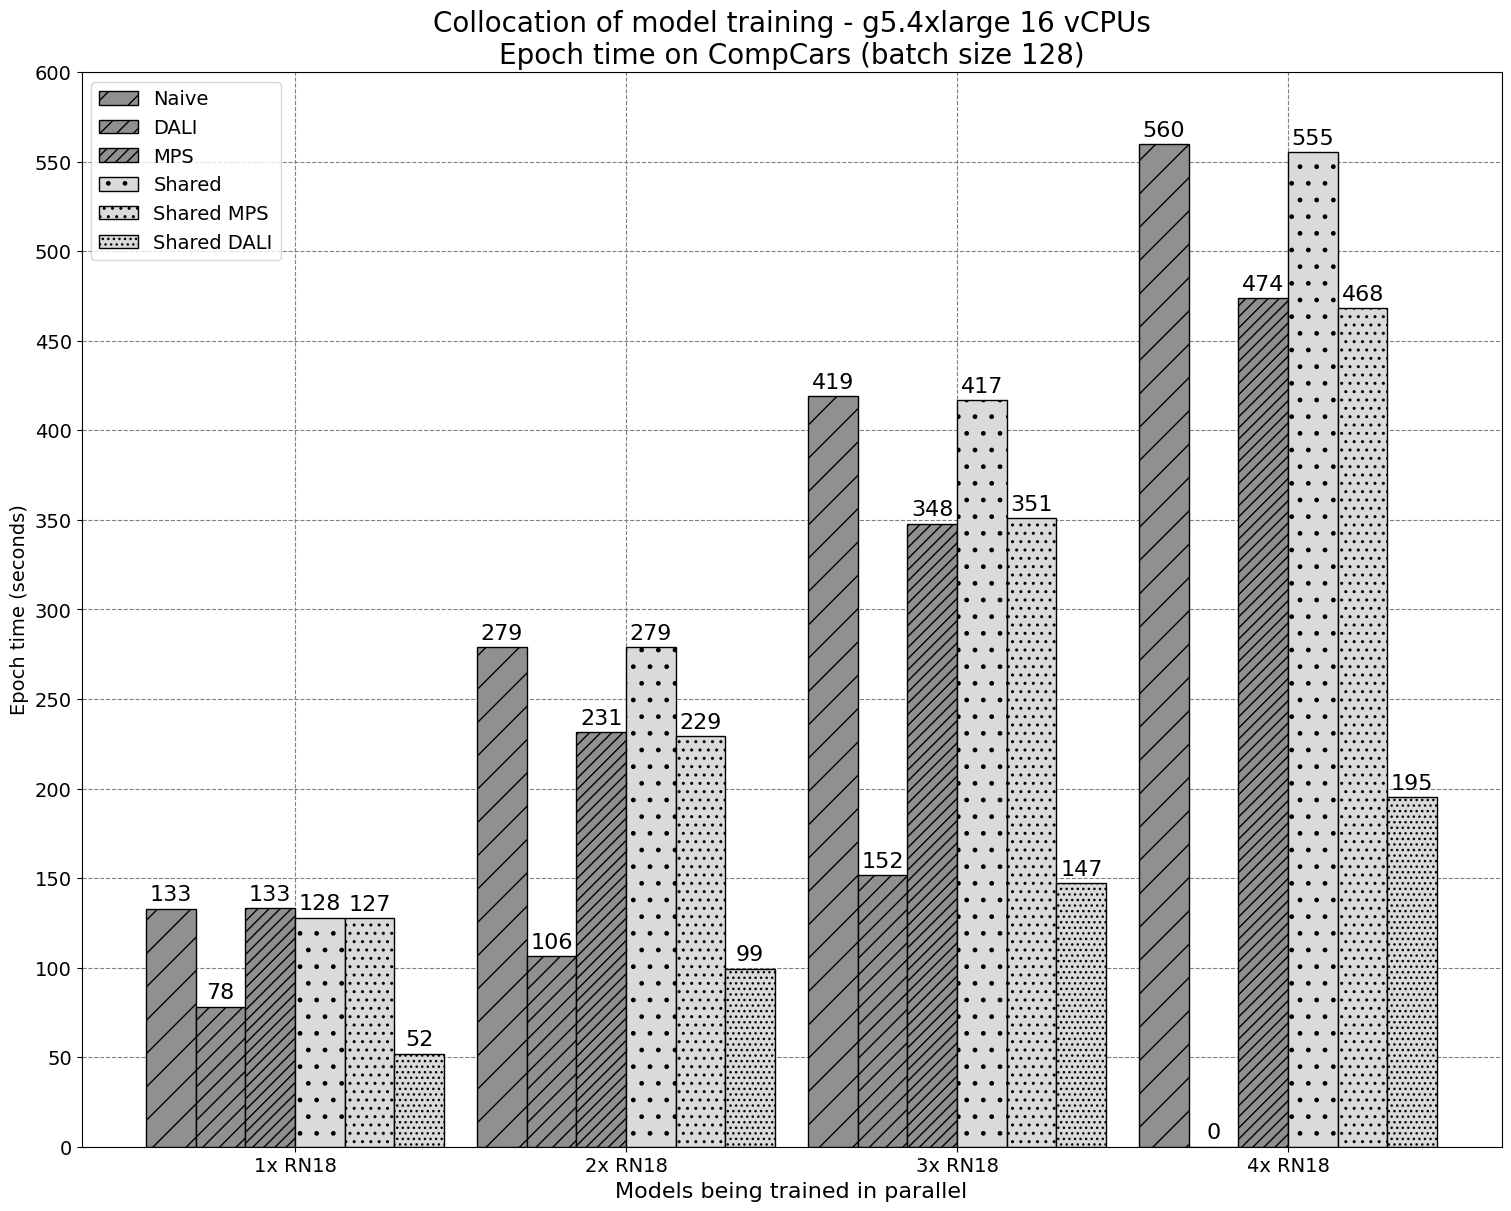

In [35]:
import matplotlib.pyplot as plt
import numpy as np

workloads = ("1x RN18", "2x RN18", "3x RN18", "4x RN18")

naive = [df.iloc[2:]["total_time"].mean() for df in [df_1x, df_2x, df_3x, df_4x]]

naive_dali = [df.iloc[2:]["total_time"].mean() for df in [df_dali_1x, df_dali_2x, df_dali_3x]] + [0]

mps = [df.iloc[2:]["total_time"].mean() for df in [df_1x_mps, df_2x_mps, df_3x_mps, df_4x_mps]]

#naive_dali_mps = [df.iloc[2:-1]["total_time"].mean() for df in [df_dali_1x_mps, df_dali_2x_mps]]

shared = [df.iloc[2:]["total_time"].mean() for df in [df_mul_1x, df_mul_2x, df_mul_3x, df_mul_4x]]

shared_dali = [df.iloc[2:]["total_time"].mean() for df in [df_mul_dali_1x, df_mul_dali_2x, df_mul_dali_3x, df_mul_dali_4x]]

shared_mps = [df.iloc[2:]["total_time"].mean() for df in [df_mul_1x_mps, df_mul_2x_mps, df_mul_3x_mps, df_mul_4x_mps]]

#shared_dali_mps = [df.iloc[2:-1]["total_time"].mean() for df in [df_mul_dali_1x_mps, df_mul_dali_2x_mps]]

measurements ={
    "Naive": naive,
    "DALI": naive_dali,
    "MPS": mps,
    #"DALI MPS": naive_dali_mps,
    "Shared": shared,
    "Shared MPS": shared_mps,
    "Shared DALI": shared_dali,
    #"Shared DALI MPS": shared_dali_mps,
}

x = np.arange(len(workloads))  # the label locations
width = 0.15  # the width of the bars
multiplier = -1.5

fig, ax = plt.subplots(layout='constrained', figsize=(15,12))
#shades = ["#0a0a0a", "#4d4c4c", "#919090", "#dbd9d9"]
#shades = ["#000000", "#1f1e1e", "#4d4b4b", "#757272", "#9c9797", "#bfbaba"]
hatches = ["/", "//", "///", ".", "..", "..."]
hatch_cols = ["#919090", "#919090", "#919090", 
              "#dbd9d9", "#dbd9d9", "#dbd9d9"]

for idx, (attribute, measurement) in enumerate(measurements.items()):
    offset = width * multiplier
    #rects = ax.bar(x + offset, measurement, width, label=attribute, color=shades[idx], edgecolor="black", yerr=measurements_err[attribute][idx], ecolor="red", capsize=5)
    #rects = ax.bar(x + offset, measurement, width, label=attribute, color=shades[idx], edgecolor="black")
    rects = ax.bar(x + offset, measurement, width, label=attribute, hatch=hatches[idx], color=hatch_cols[idx], edgecolor="black")
    ax.bar_label(rects, padding=3, fmt='%.0f', label_type="edge", color="black", size=16)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Epoch time (seconds)', fontsize=14)
ax.set_title(f'Collocation of model training - {MACHINE} {vcpu} vCPUs\nEpoch time on CompCars (batch size {BATCH_SIZE})', fontsize=20)
ax.set_xticks(x + width, workloads, fontsize=14)
ax.legend(loc='upper left', fontsize=14)

ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')
plt.yticks([i for i in range(0, 601, 50)], fontsize=14)
plt.xlabel("Models being trained in parallel", fontsize=16)
plt.show()

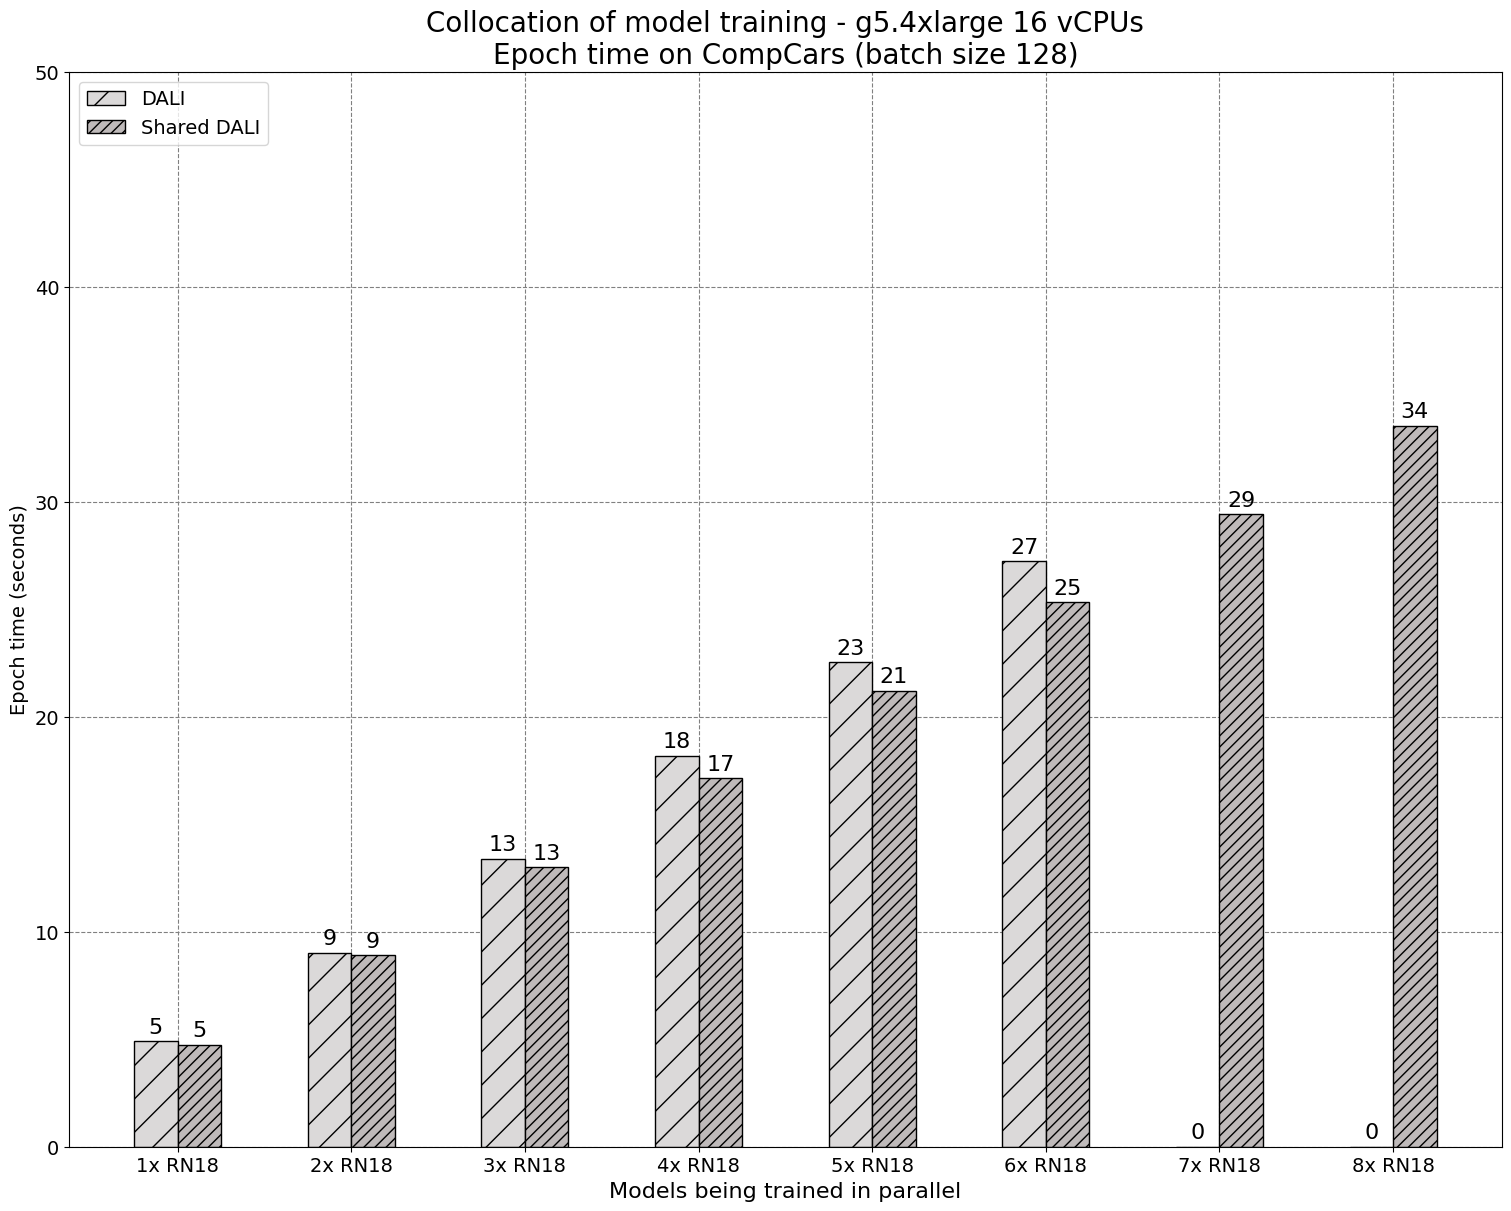

In [71]:
import matplotlib.pyplot as plt
import numpy as np

workloads = ("1x RN18", "2x RN18", "3x RN18", "4x RN18", "5x RN18", "6x RN18", "7x RN18", "8x RN18")

naive_dali = [df.iloc[2:-1]["total_time"].mean() for df in [df_dali_1x, df_dali_2x, df_dali_3x, df_dali_4x, df_dali_5x, df_dali_6x]] + [0,0]

shared_dali = [df.iloc[2:-1]["total_time"].mean() for df in [ \
    df_mul_dali_1x, df_mul_dali_2x, df_mul_dali_3x, df_mul_dali_4x, \
    df_mul_dali_5x, df_mul_dali_6x, df_mul_dali_7x, df_mul_dali_8x]]

measurements ={
    "DALI": naive_dali,
    "Shared DALI": shared_dali,
}

x = np.arange(len(workloads))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0.5

fig, ax = plt.subplots(layout='constrained', figsize=(15,12))
#shades = ["#0a0a0a", "#4d4c4c", "#919090", "#dbd9d9"]
#shades = ["#000000", "#1f1e1e", "#4d4b4b", "#757272", "#9c9797", "#bfbaba"]
#hatches = ["/", "//", "///", ".", "..", "..."]
#hatch_cols = ["#919090", "#919090", "#919090", 
              #"#dbd9d9", "#dbd9d9", "#dbd9d9"]
hatches = ["/", "///"]
hatch_cols = ["#dbd9d9", "#bfbaba"]

for idx, (attribute, measurement) in enumerate(measurements.items()):
    offset = width * multiplier
    #rects = ax.bar(x + offset, measurement, width, label=attribute, color=shades[idx], edgecolor="black", yerr=measurements_err[attribute][idx], ecolor="red", capsize=5)
    #rects = ax.bar(x + offset, measurement, width, label=attribute, color=shades[idx], edgecolor="black")
    rects = ax.bar(x + offset, measurement, width, label=attribute, hatch=hatches[idx], color=hatch_cols[idx], edgecolor="black")

    ax.bar_label(rects, padding=3, fmt='%.0f', label_type="edge", color="black", size=16)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Epoch time (seconds)', fontsize=14)
ax.set_title(f'Collocation of model training - {MACHINE} {vcpu} vCPUs\nEpoch time on CompCars (batch size {BATCH_SIZE})', fontsize=20)
ax.set_xticks(x + width, workloads, fontsize=14)
ax.legend(loc='upper left', fontsize=14)

ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')
plt.yticks([i for i in range(0, 51, 10)], fontsize=14)
plt.xlabel("Models being trained in parallel", fontsize=16)
plt.show()

In [41]:
# BASELINE

df_1x = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[0]}_gpu_util.csv")
df_2x = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[1]}_gpu_util.csv")
df_3x = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[2]}_gpu_util.csv")
df_4x = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[3]}_gpu_util.csv")

# BASELINE + MPS

df_1x_mps = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[4]}_gpu_util.csv")
df_2x_mps = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[5]}_gpu_util.csv")
df_3x_mps = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[6]}_gpu_util.csv")
df_4x_mps = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[7]}_gpu_util.csv")

# SHARED DATA

df_mul_1x = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[8]}_gpu_util.csv")
df_mul_2x = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[9]}_gpu_util.csv")
df_mul_3x = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[10]}_gpu_util.csv")
df_mul_4x = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[11]}_gpu_util.csv")

# SHARED DATA + MPS

df_mul_1x_mps = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[12]}_gpu_util.csv")
df_mul_2x_mps = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[13]}_gpu_util.csv")
df_mul_3x_mps = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[14]}_gpu_util.csv")
df_mul_4x_mps = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[15]}_gpu_util.csv")

# BASELINE + DALI

df_dali_1x = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[16]}_gpu_util.csv")
df_dali_2x = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[17]}_gpu_util.csv")
df_dali_3x = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[18]}_gpu_util.csv")
#df_dali_4x = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[19]}_gpu_util.csv")

# SHARED + DALI

df_mul_dali_1x = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[20]}_gpu_util.csv")
df_mul_dali_2x = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[21]}_gpu_util.csv")
df_mul_dali_3x = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[22]}_gpu_util.csv")
df_mul_dali_4x = pd.read_csv(train_mul_path / f"{shared_model_path_prefix}_{pids[23]}_gpu_util.csv")

In [42]:
dfs_single = [
    df_1x,
    df_2x,
    df_3x,
    df_4x,
    df_1x_mps,
    df_2x_mps,
    df_3x_mps,
    df_4x_mps,
    df_dali_1x,
    df_dali_2x,
    df_dali_3x,
    #df_dali_4x,
]

dfs_shared = [
    df_mul_1x,
    df_mul_2x,
    df_mul_3x,
    df_mul_4x,
    df_mul_1x_mps,
    df_mul_2x_mps,
    df_mul_3x_mps,
    df_mul_4x_mps,
    df_mul_dali_1x,
    df_mul_dali_2x,
    df_mul_dali_3x,
    df_mul_dali_4x,
]

lists_single, lists_shared = [], []

for idx, df in enumerate(dfs_single):
    #df[df["gpu_uuid"] == gpu_id]
    df["mem"] = df.apply(lambda x: x[" used_gpu_memory [MiB]"].strip(" MiB"), axis=1).astype(int)
    mem = df.groupby([" pid"]).max()["mem"].sum()
    #lists_single.append((idx+1, mem))
    lists_single.append(mem)

for idx, df in enumerate(dfs_shared):
    #df[df["gpu_uuid"] == gpu_id]
    df["mem"] = df.apply(lambda x: x[" used_gpu_memory [MiB]"].strip(" MiB"), axis=1).astype(int)
    mem = df.groupby([" pid"]).max()["mem"].sum()
    lists_shared.append(mem)


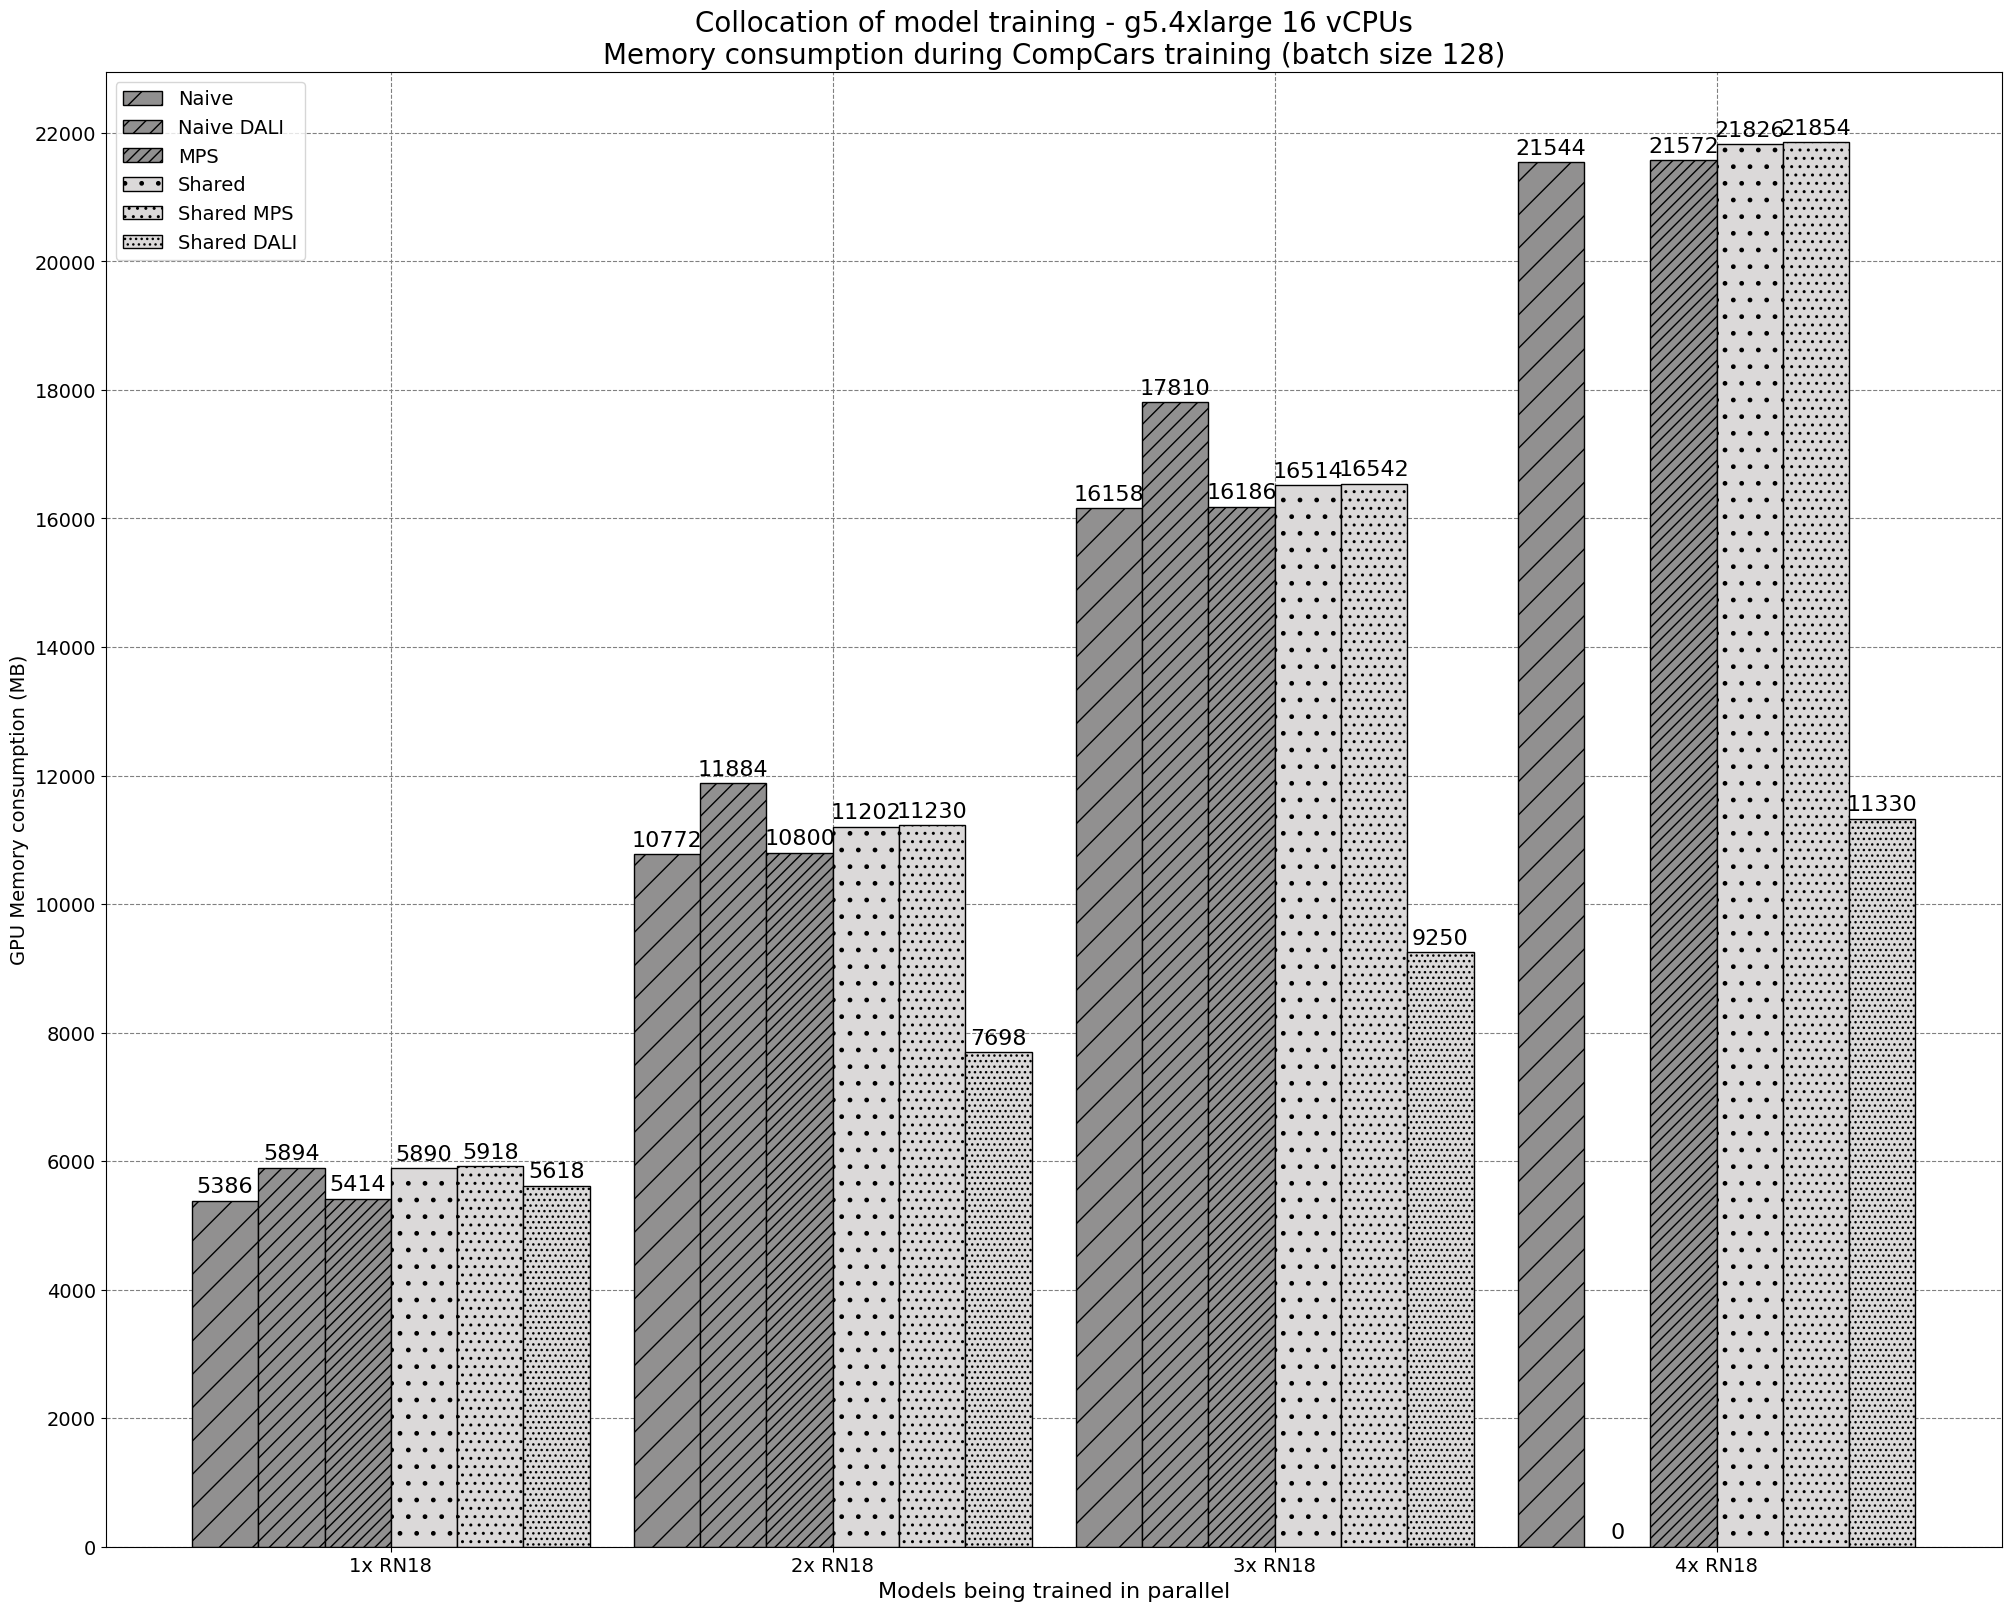

In [43]:
import matplotlib.pyplot as plt
import numpy as np

workloads = ("1x RN18", "2x RN18", "3x RN18", "4x RN18")

naive = lists_single[0:4]

mps = lists_single[4:8]

naive_dali = lists_single[8:12]

shared = lists_shared[0:4]

shared_mps = lists_shared[4:8]

shared_dali = lists_shared[8:12]

measurements ={
    "Naive": naive,
    "Naive DALI": naive_dali+[0],
    "MPS": mps,
    "Shared": shared,
    "Shared MPS": shared_mps,
    "Shared DALI": shared_dali,
}

x = np.arange(len(workloads))  # the label locations
width = 0.15  # the width of the bars
multiplier = -1.5

fig, ax = plt.subplots(layout='constrained', figsize=(20,16))
hatches = ["/", "//", "///", ".", "..", "..."]
hatch_cols = ["#919090", "#919090", "#919090", 
              "#dbd9d9", "#dbd9d9", "#dbd9d9"]

for idx, (attribute, measurement) in enumerate(measurements.items()):
    offset = width * multiplier
    #rects = ax.bar(x + offset, measurement, width, label=attribute, color=shades[idx], edgecolor="black", yerr=measurements_err[attribute][idx], ecolor="red", capsize=5)
    #rects = ax.bar(x + offset, measurement, width, label=attribute, color=shades[idx], edgecolor="black")
    rects = ax.bar(x + offset, measurement, width, label=attribute, hatch=hatches[idx], color=hatch_cols[idx], edgecolor="black")
    ax.bar_label(rects, padding=3, fmt='%.0f', label_type="edge", color="black", size=16)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('GPU Memory consumption (MB)', fontsize=14)
ax.set_title(f'Collocation of model training - {MACHINE} {vcpu} vCPUs\nMemory consumption during CompCars training (batch size {BATCH_SIZE})', fontsize=20)
ax.set_xticks(x + width, workloads, fontsize=14)
ax.legend(loc='upper left', fontsize=14)

ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')
plt.yticks([i for i in range(0, 23028, 2000)], fontsize=14)
plt.xlabel("Models being trained in parallel", fontsize=16)
plt.show()

In [76]:
cols = ["time", "cpu", "%usr", "%nice", "%sys", "%iowait", "%irq", "%soft", "%steal", "%guest", "%gnice", "%idle"]

def create_plottable_df(path, log_path):
    df_log = pd.read_csv(log_path)
    last_time = (pd.to_datetime(df_log['timestamp'], unit="s", utc=True).dt.tz_convert('Europe/Berlin')).iloc[-1].to_datetime64()

    with open(path) as f:
        lines = f.readlines()
        lines = [l for l in lines if l != "\n"]
        lines = [l.strip() for l in lines if not "CPU" in l]
        lines = [l.split() for l in lines]

    new_lines = []

    for line in lines:
        new_line = []
        for idx, l in enumerate(line):
            if idx == 0:
                new_line.append(l)
            else:
                new_line.append(float(l))
        new_lines.append(new_line)
    df = pd.DataFrame(new_lines, columns=cols)
    df = df[pd.to_datetime(df['time'], unit='ns') < last_time]
    df['running_seconds'] = pd.to_datetime(df['time'], unit='ns')

    first_timestamp = df['running_seconds'].iloc[0]
    df['running_seconds'] = (df['running_seconds'] - first_timestamp).dt.total_seconds()
    df['running_seconds_normalized'] = (df['running_seconds'] - df['running_seconds'].min()) / (df['running_seconds'].max() - df['running_seconds'].min()) * 99 + 1
    
    return df

In [77]:
def plot_dfs(dfs, title, titles, metric, normalized=True):
    fig, ax = plt.subplots(figsize=(12,8))
    if normalized:
        group = 'running_seconds_normalized'
    else:
        group = 'running_seconds'
    for idx, df in enumerate(dfs):
        average_all_cpus = df.groupby(group)[metric].mean()

        plt.plot(average_all_cpus.index, average_all_cpus.values, \
                    linewidth=1, label=titles[idx])

    plt.xlabel('Running time, normalized %')
    if metric in ["%usr", "%nice"]:
        plt.ylabel('% CPU Utilization')
        plt.title(f'{title}\nCPU Usage')
    if metric == "%iowait":
        plt.ylabel('% I/O wait')
        plt.title(f'{title}\nI/O wait')
    plt.legend()
    plt.grid(True)
    plt.ylim(0,100)
    plt.show()

In [55]:
df_1x = pd.read_csv(train_path / model_name / f"{naive_model_path_prefix}_{pids[0]}.csv")

In [74]:
dfs[0][pd.to_datetime(dfs[0]['time'], unit='ns') < a.to_datetime64()]

,time,cpu,%usr,%nice,%sys,%iowait,%irq,%soft,%steal,%guest,%gnice,%idle,running_seconds,running_seconds_normalized
0,15:32:47,0.0,6.12,0.0,0.00,31.63,0.0,0.0,0.0,0.0,0.0,62.24,0.0,1.000000
1,15:32:47,1.0,0.00,0.0,0.00,2.04,0.0,0.0,0.0,0.0,0.0,97.96,0.0,1.000000
2,15:32:47,2.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,100.00,0.0,1.000000
3,15:32:47,3.0,23.47,0.0,1.02,21.43,0.0,0.0,0.0,0.0,0.0,54.08,0.0,1.000000
4,15:32:47,4.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,100.00,0.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,15:39:32,11.0,83.17,0.0,3.96,0.00,0.0,0.0,0.0,0.0,0.0,12.87,405.0,79.772102
6492,15:39:32,12.0,17.35,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,82.65,405.0,79.772102
6493,15:39:32,13.0,0.00,0.0,1.00,0.00,0.0,0.0,0.0,0.0,0.0,99.00,405.0,79.772102
6494,15:39:32,14.0,0.99,0.0,2.97,0.00,0.0,0.0,0.0,0.0,0.0,96.04,405.0,79.772102


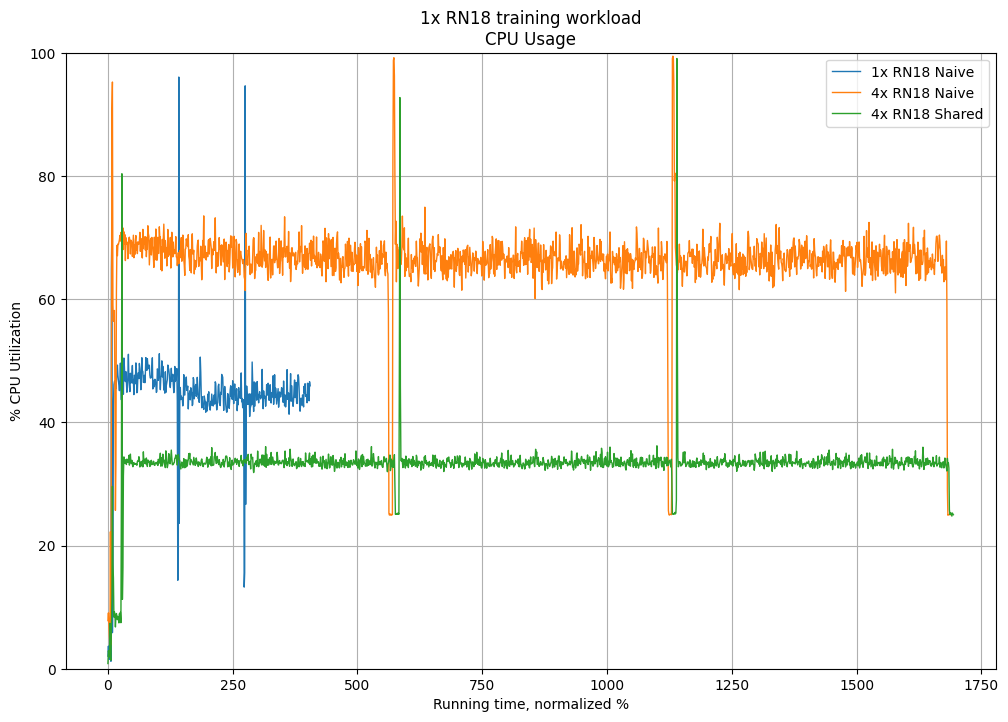

In [81]:
paths = [
    train_path / model_name / f"pid_{trace_pids[0]}_cpu.out",
    train_path / model_name / f"pid_{trace_pids[3]}_cpu.out",
    train_mul_path / f"pid_{trace_pids[11]}_cpu.out",
]

log_paths = [
    train_path / model_name / f"{naive_model_path_prefix}_{pids[0]}.csv",
    train_path / model_name / f"{naive_model_path_prefix}_{pids[3]}.csv",
    train_mul_path / f"{shared_model_path_prefix}_{pids[11]}.csv"
]

suptitles = [
    "1x RN18 Naive",
    "4x RN18 Naive",
    "4x RN18 Shared",
]
title = "1x RN18 training workload"

dfs = [create_plottable_df(path, log_paths[idx]) for idx, path in enumerate(paths)]

#plot_dfs(dfs, title, suptitles, "%iowait")
plot_dfs(dfs, title, suptitles, "%usr", False)

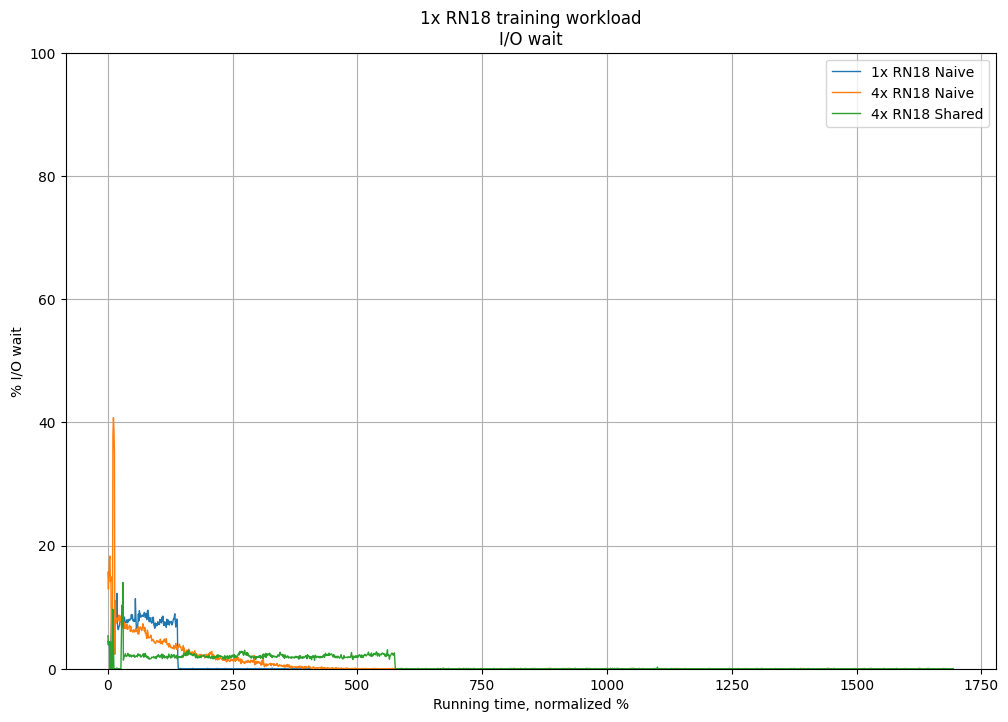

In [80]:
paths = [
    train_path / model_name / f"pid_{trace_pids[0]}_cpu.out",
    train_path / model_name / f"pid_{trace_pids[3]}_cpu.out",
    train_mul_path / f"pid_{trace_pids[11]}_cpu.out",
]

log_paths = [
    train_path / model_name / f"{naive_model_path_prefix}_{pids[0]}.csv",
    train_path / model_name / f"{naive_model_path_prefix}_{pids[3]}.csv",
    train_mul_path / f"{shared_model_path_prefix}_{pids[11]}.csv"
]

suptitles = [
    "1x RN18 Naive",
    "4x RN18 Naive",
    "4x RN18 Shared",
]
title = "1x RN18 training workload"

dfs = [create_plottable_df(path, log_path) for path, log_path in zip(paths, log_paths)]

plot_dfs(dfs, title, suptitles, "%iowait", normalized=False)
#plot_dfs(dfs, title, suptitles, "%usr")